In [1]:
from phygnn import PhysicsGuidedNeuralNetwork, p_fun_dummy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x1 = np.arange(500) - 250
x2 = np.arange(500) - 250
x1, x2 = np.meshgrid(x1, x2)
x1 = x1.flatten()
x2 = x2.flatten()
x3 = x1 * x2
features = pd.DataFrame({'x1': x1, 'x2': x2})
features.head()

,x1,x2
0,-250,-250
1,-249,-250
2,-248,-250
3,-247,-250
4,-246,-250


In [3]:
y = ((x1 * x2) > 0).astype(bool).astype(float)
labels = pd.DataFrame({'y': y})
labels.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [4]:
hidden_layers = [{'units': 16},
                 {'activation': 'relu'},
                 {'units': 16}, 
                 {'activation': 'relu'},
                ]
output_layer = [{'units': 1}, 
                {'activation': 'sigmoid'},
               ]

In [5]:
PhysicsGuidedNeuralNetwork.seed(0)
model = PhysicsGuidedNeuralNetwork(p_fun=p_fun_dummy, 
                                   hidden_layers=hidden_layers,
                                   output_layer=output_layer,
                                   loss_weights=(1.0, 0.0), 
                                   metric='binary_crossentropy',
                                   learning_rate=0.05,
                                   n_features=2, n_labels=1)
model.fit(features, labels, features, n_batch=1, n_epoch=50)

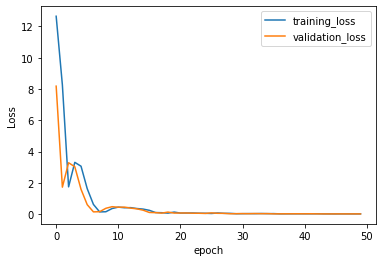

Accuracy: 99.49%


In [6]:
model.history[['training_loss', 'validation_loss']].plot()
plt.ylabel('Loss')
plt.show()
plt.close()

y_pred = model.predict(features)
accuracy = 100 * (np.round(y_pred) == labels.values).sum() / len(labels)
print('Accuracy: {:.2f}%'.format(accuracy))